# Bit Flip error

A bit flip error is specific type of error where the qubits computational state flips from 1 to 0 or vice versa.

However a bit flip can be corrected using the bit flip code. This is a 3 qubit circuit that makes use of 2 ancillary qubits to correct 1 qubit. 

Process: Main process is that , suppose we have state now we need to correct bit flip errors in that , then what we will do is we will copy its code to ancillary qubits by cnot gate and then we simulate a bit flip and then will correct it by again using the cnot to copy data and then toffoli gate

For example let’s say the main qubits state was 0. CNOT gates will be applied to the ancillary qubits which will leave them unchanged since the main qubits state was 0. 

Next a bit flip occurs which flips the main qubits state to 1. After the bit flip CNOT gates are applied to the ancillary qubits which will flip their states to 1 since the main qubits state is 1. 

Then a toffoli gate is applied to the main qubit which will flip the state of the qubit since the ancillary qubits states are 1. This flips the state of the main qubit to 0 thus correcting the error. 

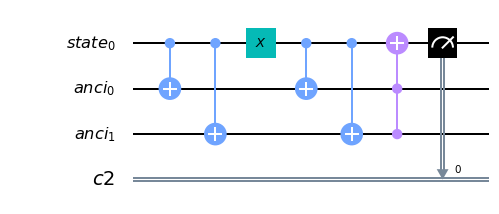

In [6]:
from qiskit import *
qr1 = QuantumRegister(1,name = 'state') #main state
qr2 = QuantumRegister(2,name = "anci") # ancillary qubits
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr1,qr2,cr)
qc.cx(0,1)
qc.cx(0,2)
qc.x(0) #flipping the first qubit
qc.cx(0,1)
qc.cx(0,2)
qc.ccx(2,1,0)
qc.measure(0,0)
qc.draw('mpl')

In [10]:
# implementation
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend).result()
counts = result.get_counts(qc)
print(counts)

{'0': 1024}


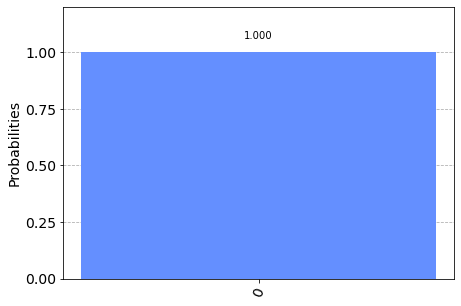

In [11]:
 plot_histogram(counts)

ibmqfactory.load_account:WARNING:2020-08-11 11:56:37,290: Credentials are already in use. The existing account in the session will be replaced.


ibmq_burlington
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 1
    backend_version: 1.1.4
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    allow_object_storage: True
    credits_required: True
    online_date: 2019-09-13 04:00:00+00:00
    open_pulse: False
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    meas_map: [[0, 1, 2, 3, 4]]
    conditional: False
    memory: True
    max_experiments: 75
    description: 5 qubit device Burlington
    backend_name: ibmq_burlington
    sample_name: Giraffe
    quantum_volume: 8
    n_registers: 1
    url: None
    max_shots: 8192
    allow_q_object: True

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 4.64156 GHz / 82.97706 µs / 52.71672 µs / 0 / 0.00062 / 0.00124 / 0.0745
    Q1 / 4.72005 GHz / 90.84651